**TreeBuilder params:**

- `tb_max_tokens`
Defines the maximum number of tokens allowed per chunk or node during tree construction.

- `tb_num_layers`  
  Specifies the number of hierarchical layers that the tree builder should create in the final tree.

- `tb_threshold`  
  Sets a similarity threshold used in grouping nodes during tree construction to determine if they should be summarized together.

- `tb_top_k`  
  Limits the number of similar nodes the tree builder should consider for grouping or summarization.

- `tb_summarization_length`  
  Controls the maximum length (in tokens) for summaries generated for nodes when building the tree.
  

**TreeRetriever Params:**
- `tr_threshold`  
  A float value that serves as a similarity threshold to filter nodes during the retrieval process.

- `tr_top_k`  
  Indicates the number of top nodes to consider when selecting the most relevant nodes during retrieval.

- `tr_num_layers`  
  Sets the number of tree layers to traverse during retrieval, allowing control over how deep to search for relevant nodes.


- `qa_model`  
  Specifies the Question Answering model instance that processes queries against the built tree.



In [ ]:
%load_ext autoreload
%autoreload 2
import json
import os
import fitz  # PyMuPDF
from google import genai



from raptor.RetrievalAugmentation import RetrievalAugmentation, RetrievalAugmentationConfig
# update these at runtime
os.environ["OPENAI_API_KEY"] = ""
os.environ["GEMINI_API_KEY"] = ""  

In [40]:
# Initialize with a custom configuration. For advanced configurations, check the documentation. [WIP]
custom_config = RetrievalAugmentationConfig(
    # TreeBuilder params
    tb_max_tokens=400,
    tb_num_layers=5,    
    tb_threshold=0.75,   # similarity threshold before merging children into parents
    tb_top_k=5,        
    tb_summarization_length=220,
    # TreeRetriever params
    tr_threshold=0.75,  # Threshold for how 
    tr_top_k=5,  # TopK like similarity search from vector DB's
    # Defaults
    qa_model=None,  # QuestionAnswer
    embedding_model=None,
    summarization_model=None
)

# Initialize RetrievalAugmentation
RA = RetrievalAugmentation(config=custom_config)

2025-03-21 15:54:16,529 - Successfully initialized TreeBuilder with Config 
        TreeBuilderConfig:
            Tokenizer: <Encoding 'cl100k_base'>
            Max Tokens: 400
            Num Layers: 5
            Threshold: 0.75
            Top K: 5
            Selection Mode: top_k
            Summarization Length: 220
            Summarization Model: <raptor.SummarizationModels.GPT3TurboSummarizationModel object at 0x34896f850>
            Embedding Models: {'OpenAI': <raptor.EmbeddingModels.OpenAIEmbeddingModel object at 0x348e06290>}
            Cluster Embedding Model: OpenAI
        
        Reduction Dimension: 10
        Clustering Algorithm: RAPTOR_Clustering
        Clustering Parameters: {}
        
2025-03-21 15:54:16,529 - Successfully initialized ClusterTreeBuilder with Config 
        TreeBuilderConfig:
            Tokenizer: <Encoding 'cl100k_base'>
            Max Tokens: 400
            Num Layers: 5
            Threshold: 0.75
            Top K: 5
            Sel

In [41]:
from veritas import create_gemini_evaluation
# Load PDF and extract text
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = "\n\n".join(page.get_text("text") for page in doc)
    return text

# Example usage
pdf_text = extract_text_from_pdf("./pdfs/clm104c13.pdf")

# Add extracted text to RAPTOR
RA.add_documents(pdf_text)

# Create evaluation questions from the same document
qa_pairs = create_gemini_evaluation(pdf_text, num_questions=15)

2025-03-21 16:00:46,177 - Creating Leaf Nodes
2025-03-21 16:00:46,804 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:00:46,839 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:00:46,881 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:00:46,887 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:00:47,297 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:00:47,442 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:00:47,525 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:00:47,529 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:00:47,863 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:00:47,884 - HTTP Request: POST https://a

Error in document analysis: Unterminated string starting at: line 77 column 18 (char 29816)


2025-03-21 16:03:33,489 - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-03-21 16:03:33,492 - AFC remote call 1 is done.
2025-03-21 16:03:33,493 - AFC is enabled with max remote calls: 10.
2025-03-21 16:03:37,483 - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-03-21 16:03:37,490 - AFC remote call 1 is done.
2025-03-21 16:03:37,491 - AFC is enabled with max remote calls: 10.
2025-03-21 16:03:39,941 - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-03-21 16:03:39,945 - AFC remote call 1 is done.
2025-03-21 16:03:39,948 - AFC is enabled with max remote calls: 10.
2025-03-21 16:03:43,731 - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-03-21 16:03:43,735 - AFC

In [ ]:
from veritas import IndependentKnowledgeSource, EnhancedRAPTOREvaluator

# Initialize evaluator with your RAPTOR instance
evaluator = EnhancedRAPTOREvaluator(
    qa_pairs=qa_pairs,
    ra_instance=RA,
    source_document=pdf_text,  # Pass the source doc for fact checking
    use_gemini=True  # Use Gemini for better performance
)

# Run evaluation and generate report
print("Generating Results...\n")
results = evaluator.perform_comprehensive_evaluation()
print("\n\nGenerating Report...\n")


In [49]:
report = evaluator.generate_evaluation_report()

2025-03-21 16:38:30,080 - Using collapsed_tree
2025-03-21 16:38:30,998 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:38:35,186 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 16:38:35,204 - AFC is enabled with max remote calls: 10.
2025-03-21 16:38:36,525 - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-03-21 16:38:36,528 - AFC remote call 1 is done.
2025-03-21 16:38:36,530 - Using collapsed_tree
2025-03-21 16:38:37,060 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:38:40,827 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 16:38:40,833 - AFC is enabled with max remote calls: 10.
2025-03-21 16:38:41,747 - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2

In [50]:
report

{'summary_stats': {'avg_accuracy': 8.533333333333333,
  'avg_completeness': 8.733333333333333,
  'avg_faithfulness': 10.0,
  'avg_relevance': 9.6,
  'avg_keyword_match': 0.48357142857142865,
  'avg_aggregate_score': 8.405621693121693,
  'question_count': 15,
  'perfect_score_count': 7,
  'poor_score_count': 2},
 'common_missing_elements': {'Order for the X-ray': 2,
  'Revenue code': 1,
  'Evidence of image access and review': 1,
  "Statement that the interpretation report should be separate from the technician's notes": 1,
  'Patient Identification': 1,
  'Attestation': 1,
  'Detailed explanation of why other options are incorrect': 1,
  'Reference to specific section of Medicare Claims Processing Manual': 1,
  'FX modifier as the primary reason for denial': 1,
  'Correct application of the anti-markup rule to RHC billing for outside lab services.': 1,
  "Requirement to include the lab's NPI and charge on the claim.": 1},
 'detailed_results': [{'question': 'A patient presents to a hosp

In [132]:
question = "what is the reduction dimension?"
answer = RA.answer_question(question=question)
print("Answer: ", answer)

2025-03-21 13:28:17,319 - Using collapsed_tree
2025-03-21 13:28:21,375 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 13:28:26,642 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Answer:  The reduction in dimension is a process used in data analysis where the number of random variables under consideration is reduced. This is achieved by obtaining a set of principal variables. It can be a linear or non-linear transformation to distill the high-dimensional data into a lower-dimensional space. In the context of the Gaussian Mixture Model (GMM) mentioned in the text, the number of parameters k is a function of the dimensionality of the input vectors and the number of clusters. The optimal number of clusters is determined by the Bayesian Information Criterion (BIC), which helps in estimating the dimension of a model.


In [7]:
q2 = "How does Medicare determine the correct jurisdiction for a reassigned service claim?"
answer2 = RA.answer_question(question=q2)
print("Answer: ", answer2)

2025-03-21 13:47:01,350 - Using collapsed_tree
2025-03-21 13:47:01,979 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 13:47:08,689 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Answer:  Medicare determines the correct jurisdiction for a reassigned service claim based on the location where the service was provided. The payment locality is determined based on the location where a specific service code was furnished. For purposes of determining the appropriate payment locality, CMS requires that the address, including the ZIP code for each service code be included on the claim form. This is done to account for the variation in resource costs across different geographical locations as measured by the geographic practice cost indices (GPCIs). If the global diagnostic service code is billed, the biller must report the address and ZIP code of where the test was furnished on the bill for the global diagnostic service code. The locality is determined by the ZIP code applicable to the testing facility, i.e., where the Technical Component (TC) of the service was furnished.


In [52]:
q2 = "How does Medicare determine the correct jurisdiction for a reassigned service claim?"
answer2 = RA.answer_question(question=q2)
print("Answer: ", answer2)

2025-03-21 16:48:55,576 - Using collapsed_tree
2025-03-21 16:48:56,260 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:48:58,515 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Answer:  Medicare determines the correct jurisdiction for a reassigned service claim based on the location where the service was furnished. This is done by requiring the address, including the ZIP code, for each service code to be included on the claim form. The payment locality is determined by the geographic location where the specific service was provided, as measured by the geographic practice cost indices (GPCIs). This information is entered on the ASC X12 837 professional claim format or in Item 32 on the paper claim Form CMS-1500. This ensures that the payment amounts reflect the relative resources required to provide services, which vary among payment localities.


In [51]:
SAVE_PATH = "./saved_trees/ch13_20250321_1648"
RA.save(SAVE_PATH)

2025-03-21 16:48:51,320 - Tree successfully saved to ./saved_trees/ch13_20250321_1648


In [11]:

import pandas as pd
import openai
import json
questions = [
    "What are the electronic submission requirements for Medicare claims?",
    "What HIPAA standards apply to Medicare claims processing?",
    "Where can I purchase HIPAA standard implementation guides?",
    "What are the paper format requirements for institutional claims?",
    "What information should be included in remittance advices?",
    "How does Medicare determine the correct jurisdiction for a payment request?",
    "What are the payment jurisdiction rules for physician fee schedules?",
    "What exceptions exist for jurisdictional claims processing for DME suppliers?",
    "How are ambulance services submitted to carriers?",
    "How are independent laboratory claims processed?",
    "What transmittals have been issued for Chapter 1?",
    "What are the latest updates in Medicare’s general billing requirements?",
    "What are the most common claim rejection reasons under this manual?",
    "What should be included in a Medicare claim to avoid rejections?",
    "What is the process for submitting a reconsideration request for a denied Medicare claim?"
]

# 🔹 Store Q/A Pairs
qa_results = []

# 🔹 Query RAPTOR and Store Results
for question in questions:
    answer = RA.answer_question(question=question)
    qa_results.append({"question": question, "retrieved_answer": answer})

# 🔹 Initialize OpenAI Client
client = openai.OpenAI()

# 🔹 Evaluate Each Q/A Pair Using GPT-4o-mini
for qa in qa_results:
    prompt = f"""
    Evaluate the following Question & Answer pair based on:

    - **Accuracy (0-10):** Does the answer correctly address the question based on Medicare's official guidelines?
    - **Completeness (0-10):** Does the answer include all relevant details?
    - **Faithfulness (0-10):** Does the answer strictly use information from the document without hallucination?
    - **Relevance (0-10):** Does the answer stay focused on the question, or does it introduce unrelated/extraneous information?
    - **Feedback:** Provide a brief explanation of the scores and suggest improvements.

    **respond ONLY with a JSON object** in the format:
    {{"feedback": str, "metrics": {{"accuracy": int, "completeness": int, "faithfulness": int, "relevance": int}}}}

    **Do NOT include markdown, code blocks, or explanations outside the JSON response.**  
    We will **directly parse your output**, so it must be a **valid JSON object**.


    ---  
    **Question:** {qa["question"]}
    **Retrieved Answer:** {qa["retrieved_answer"]}
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",  # 🔹 Use the latest model for evaluation
        messages=[{"role": "system", "content": "You are an expert evaluator of Medicare compliance documents. Return a JSON object only."},
                  {"role": "user", "content": prompt}],
        temperature=0.0  # 🔹 Ensures deterministic, consistent evaluations
    )

    evaluation_text = response.choices[0].message.content.strip()

    # 🔹 Attempt to parse JSON safely
    try:
        evaluation_data = json.loads(evaluation_text)

        # Ensure expected structure exists
        if "metrics" in evaluation_data and all(
            key in evaluation_data["metrics"] for key in ["accuracy", "completeness", "faithfulness", "relevance"]
        ):
            qa.update({
                "accuracy": evaluation_data["metrics"]["accuracy"],
                "completeness": evaluation_data["metrics"]["completeness"],
                "faithfulness": evaluation_data["metrics"]["faithfulness"],
                "relevance": evaluation_data["metrics"]["relevance"],
                "feedback": evaluation_data["feedback"]
            })
        else:
            raise ValueError("Missing expected JSON keys in response.")

    except Exception as e:
        qa.update({
            "accuracy": None,
            "completeness": None,
            "faithfulness": None,
            "relevance": None,
            "feedback": f"Error parsing evaluation: {str(e)}"
        })

2025-03-21 13:51:23,455 - Using collapsed_tree
2025-03-21 13:51:24,042 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 13:51:30,286 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 13:51:30,291 - Using collapsed_tree
2025-03-21 13:51:31,007 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 13:51:37,050 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 13:51:37,056 - Using collapsed_tree
2025-03-21 13:51:37,940 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 13:51:39,255 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 13:51:39,260 - Using collapsed_tree
2025-03-21 13:51:39,616 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 13:51:45,338 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/

In [12]:
# 🔹 Convert Results to DataFrame
import pandas as pd
df_results = pd.DataFrame(qa_results)

In [13]:
df_results

,question,retrieved_answer,accuracy,completeness,faithfulness,relevance,feedback
0,What are the electronic submission requirement...,Medicare claims can be electronically submitte...,9,7,10,9,The answer provides a good overview of the ele...
1,What HIPAA standards apply to Medicare claims ...,The HIPAA standards that apply to Medicare cla...,9,8,10,10,The answer accurately addresses the question b...
2,Where can I purchase HIPAA standard implementa...,HIPAA standard implementation guides can be pu...,9,7,10,10,The answer accurately identifies a source for ...
3,What are the paper format requirements for ins...,Institutional claims should be submitted using...,9,8,9,9,The answer accurately addresses the question r...
4,What information should be included in remitta...,Remittance advices should include the followin...,9,8,9,10,The answer provides a comprehensive list of in...
5,How does Medicare determine the correct jurisd...,Medicare determines the correct jurisdiction f...,9,8,8,9,The answer accurately addresses the question b...
6,What are the payment jurisdiction rules for ph...,The payment jurisdiction rules for physician f...,9,8,10,9,The answer accurately describes the payment ju...
7,What exceptions exist for jurisdictional claim...,The provided context does not contain informat...,10,5,10,10,The answer accurately states that the provided...
8,How are ambulance services submitted to carriers?,The context does not provide information on ho...,2,1,5,6,The answer does not address the question as it...
9,How are independent laboratory claims processed?,Independent laboratory claims are processed us...,8,6,9,7,The answer accurately describes the processing...


In [53]:
from evaluator import RAPTOREvaluator

questions_answers = [
    {
        "question": "What is the main focus of Chapter 13 in the Medicare Claims Processing Manual?",
        "example_answer": "Chapter 13 focuses on Radiology Services and Other Diagnostic Procedures."
    },
    {
        "question": "Which section of Chapter 13 covers ICD Coding for Diagnostic Tests?",
        "example_answer": "The section titled '10 - ICD Coding for Diagnostic Tests' provides coding guidelines for diagnostic tests in radiology."
    },
    {
        "question": "What is the difference between the Professional Component (PC) and the Technical Component (TC) in radiology billing?",
        "example_answer": "The Professional Component (PC) refers to the interpretation and reporting by the radiologist, while the Technical Component (TC) covers the use of equipment and the execution of the imaging procedure."
    },
    {
        "question": "What information is provided under 'Payment Conditions for Radiology Services' in Chapter 13?",
        "example_answer": "It outlines the billing rules, payment conditions, and reimbursement guidelines for radiology services, including details for both professional and technical components."
    },
    {
        "question": "How are radiology services provided in leased departments treated under Medicare billing rules?",
        "example_answer": "Services furnished in leased hospital departments are subject to special billing instructions that differentiate them from in-house hospital services, affecting both reimbursement and claim processing."
    },
    {
        "question": "What is the purpose of the 'Special Rule to Incentivize Transition from Traditional X-Ray Imaging to Digital Radiography'?",
        "example_answer": "This rule is designed to encourage the adoption of digital radiography by providing financial incentives, thereby promoting more modern imaging technologies over traditional film-based methods."
    },
    {
        "question": "How does Medicare handle billing for radiology services that are not furnished in hospitals?",
        "example_answer": "Radiology services provided outside of hospitals are billed under the Medicare Physician Fee Schedule with specific guidelines that account for the different service settings."
    },
    {
        "question": "What HCPCS codes are designated for Low Osmolar Contrast Media (LOCM) in Chapter 13?",
        "example_answer": "The HCPCS codes for LOCM are Q9945 through Q9951."
    },
    {
        "question": "What payment criteria are outlined for Low Osmolar Contrast Media (LOCM) in Chapter 13?",
        "example_answer": "Payment for LOCM is based on clinical criteria, proper use of contrast media, and may include reductions if non-compliant imaging equipment is used."
    },
    {
        "question": "What are the key billing instructions for Magnetic Resonance Imaging (MRI) Procedures in this chapter?",
        "example_answer": "The billing instructions for MRI include specific coding requirements, the use of appropriate modifiers, and guidelines for differentiating between technical and professional components."
    },
    {
        "question": "How does Magnetic Resonance Angiography (MRA) differ from standard MRI as outlined in Chapter 13?",
        "example_answer": "MRA is specifically focused on imaging blood vessels and requires additional coding and coverage criteria compared to standard MRI, which covers a broader range of imaging procedures."
    },
    {
        "question": "What is the significance of modifier codes such as KX and FX in radiology billing?",
        "example_answer": "Modifiers like KX and FX indicate special billing circumstances or adjustments, such as confirming that a service was performed under specific conditions, which in turn can affect the payment amount."
    },
    {
        "question": "How does Chapter 13 address the anti-markup payment limitation for diagnostic tests?",
        "example_answer": "It sets forth rules that limit payment to the lowest of several amounts—such as the provider’s net charge or the fee schedule amount—ensuring that excessive markups are not applied."
    },
    {
        "question": "What are the potential consequences of not including required line item details in a radiology claim?",
        "example_answer": "Failure to include necessary details like revenue codes, service dates, or proper modifiers can lead to claim denials, payment reductions, or delays in processing."
    },
    {
        "question": "How are Payment Conditions for PET scans addressed in Chapter 13?",
        "example_answer": "The chapter provides detailed billing and coverage guidelines for PET scans, specifying the appropriate CPT/HCPCS codes, modifiers, and conditions under which PET scans are reimbursed."
    },
    {
        "question": "What special billing instructions are provided for PET scans related to conditions such as myocardial viability or breast cancer?",
        "example_answer": "Special instructions include using designated CPT codes and modifiers, along with specific coverage criteria that ensure the PET scan is justified for conditions like myocardial viability or breast cancer."
    },
    {
        "question": "How does Chapter 13 differentiate between diagnostic and therapeutic nuclear medicine services?",
        "example_answer": "Diagnostic nuclear medicine services are billed separately based on the imaging procedure and radiopharmaceuticals used, whereas therapeutic nuclear medicine services may be bundled with other treatment costs and have their own coding requirements."
    },
    {
        "question": "Explain the use of CPT Modifier '-51' in the context of nuclear medicine billing.",
        "example_answer": "CPT Modifier '-51' is applied when multiple procedures are performed on the same day, indicating that a reduction should be applied to the overall payment as per the multiple procedure policy."
    },
    {
        "question": "What role do Medicare Summary Notices (MSN) play in the radiology claims process as described in Chapter 13?",
        "example_answer": "MSNs provide detailed feedback on submitted claims, including explanations for denials or adjustments, and help both providers and contractors reconcile billing discrepancies."
    },
    {
        "question": "Analyze how Chapter 13 integrates billing instructions across various modalities (CT, MRI, PET, nuclear medicine) to create a cohesive framework for radiology services.",
        "example_answer": "Chapter 13 unifies diverse billing rules and coding standards by offering a comprehensive set of guidelines that span multiple imaging modalities. This integration ensures consistency in claim processing, proper reimbursement, and compliance with Medicare regulations across different types of radiology services."
    }
]

evaluator = RAPTOREvaluator(questions_answers, RA)
df_evaluations = evaluator.evaluate()
print(df_evaluations)
# Query RAPTOR and store results by retrieving answers for each question.


2025-03-21 16:49:16,479 - Using collapsed_tree
2025-03-21 16:49:17,147 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:49:19,505 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 16:49:21,479 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 16:49:21,481 - Using collapsed_tree
2025-03-21 16:49:21,857 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:49:23,063 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 16:49:24,202 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 16:49:24,207 - Using collapsed_tree
2025-03-21 16:49:24,545 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-21 16:49:31,456 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-21 16:49:33,842 - HTT

                                                                                                                                                                    question  \
0                                                                                             What is the main focus of Chapter 13 in the Medicare Claims Processing Manual?   
1                                                                                                        Which section of Chapter 13 covers ICD Coding for Diagnostic Tests?   
2                                                      What is the difference between the Professional Component (PC) and the Technical Component (TC) in radiology billing?   
3                                                                              What information is provided under 'Payment Conditions for Radiology Services' in Chapter 13?   
4                                                                            How are radiology services provided in leas

In [15]:
pd.set_option("display.max_colwidth", 500)  # Increase width limit
df_evaluations

,question,example_answer,retrieved_answer,accuracy,completeness,faithfulness,relevance,feedback
0,What is the main focus of Chapter 13 in the Medicare Claims Processing Manual?,Chapter 13 focuses on Radiology Services and Other Diagnostic Procedures.,"The main focus of Chapter 13 in the Medicare Claims Processing Manual is on Radiology Services and Other Diagnostic Procedures. It provides detailed information on billing, payment conditions, and specific guidelines for various diagnostic tests. The chapter covers topics such as ICD coding for diagnostic tests, payment conditions for radiology services distinguishing between Professional Component (PC) and Technical Component (TC), as well as specific scenarios like services not provided in...",10,10,10,10,"The retrieved answer accurately addresses the question and provides a comprehensive overview of Chapter 13, including relevant details about billing, payment conditions, and specific guidelines. It remains focused on the topic without introducing unrelated information."
1,Which section of Chapter 13 covers ICD Coding for Diagnostic Tests?,The section titled '10 - ICD Coding for Diagnostic Tests' provides coding guidelines for diagnostic tests in radiology.,Section 10 of Chapter 13 in the Medicare Claims Processing Manual covers ICD Coding for Diagnostic Tests.,9,7,10,10,"The retrieved answer accurately identifies the section and its content, aligning well with the example good answer. However, it lacks some detail about the specific focus on radiology, which is mentioned in the example. Overall, it is a strong response but could be improved in completeness."
2,What is the difference between the Professional Component (PC) and the Technical Component (TC) in radiology billing?,"The Professional Component (PC) refers to the interpretation and reporting by the radiologist, while the Technical Component (TC) covers the use of equipment and the execution of the imaging procedure.","The Professional Component (PC) and the Technical Component (TC) in radiology billing refer to different aspects of the services provided. The Professional Component (PC) pertains to the work done by the physician, such as interpreting and reporting on the results of a radiology procedure. This includes the supervision, interpretation, and a written report of the radiology service. On the other hand, the Technical Component (TC) refers to the technical aspects of the service, such as the use...",9,8,9,8,"The retrieved answer accurately describes the differences between the Professional Component (PC) and the Technical Component (TC) in radiology billing, providing detailed explanations for both components. However, it includes additional information about billing rules that is not present in the example good answer, which slightly detracts from its completeness and relevance. Overall, it remains focused on the question."
3,What information is provided under 'Payment Conditions for Radiology Services' in Chapter 13?,"It outlines the billing rules, payment conditions, and reimbursement guidelines for radiology services, including details for both professional and technical components.","The 'Payment Conditions for Radiology Services' in Chapter 13 of the Medicare Claims Processing Manual provides detailed information on how payment for radiology services is handled. It categorizes radiology services into Professional Component (PC) and Technical Component (TC), with different billing rules based on the setting. For services furnished to hospital patients, A/B MACs (B) pay only if the services meet the conditions for fee schedule payment and are identifiable, direct, and dis...",10,10,10,10,"The retrieved answer provides a comprehensive overview of the payment conditions for radiology services, including the categorization into Professional and Technical Components, specific billing rules, and payment conditions for various settings. It accurately reflects the guidelines and includes relevant details that 

In [ ]:
import openai
import json
import pandas as pd

class ClaimAssessor:
    def __init__(self, ra_instance, model="gpt-4o-mini", temperature=0.0):
        """
        Initializes the ClaimAssessor.
        Parameters:
          - ra_instance: An instance of RAPTOR (RetrievalAugmentation) used to query the rules corpus.
          - model: The OpenAI model to use for all LLM calls.
          - temperature: The temperature for API calls.
        """
        self.ra = ra_instance
        self.model = model
        self.temperature = temperature
        self.client = openai.OpenAI()

    def expand_claim_to_queries(self, claim):
        """
        Uses an LLM call to convert a raw claim into one or more queries.
        Returns a list of query strings.
        """
        prompt = f"""
    You are an expert in Medicare radiology rules (Chapter 13). 
    Your goal is to determine whether a given claim will be rejected or denied.
    Given the following claim details, generate a JSON object with a key "queries" whose value is a list of one or more natural language queries that can be used to search the rules corpus. 
    Your queries should reference the procedure description, relevant CPT and ICD codes, and any financial or coding details that might impact claim acceptance.
    I will pass your queries to an LLM configured with RAPTOR RAG, built from Chapter 13.
    
    Claim details:
    ID: {claim.get('id')}
    Procedure Description: {claim.get('procedure_description')}
    Place of Service: {claim.get('place_of_service')}
    Service Type: {claim.get('service_type')}
    CPT Codes: {', '.join(claim.get('cpt_codes', []))}
    ICD Codes: {', '.join(claim.get('icd_codes', []))}
    Charge Amount: {claim.get('charge_amount')}
    Status: {claim.get('status')}
    Pre-Auth Status: {claim.get('pre_auth_status')}
    
    Respond ONLY with a JSON object in the format:
    {{"queries": ["query1", "query2", ...]}}
    Do NOT include any additional text.
    """
        response = self.client.chat.completions.create(
            model=self.model,
            messages=[
                {"role": "system", "content": "You are an expert in generating precise search queries for Medicare Chapter 13 rules."},
                {"role": "user", "content": prompt}
            ],
            temperature=self.temperature
        )
        output = response.choices[0].message.content.strip()
        try:
            data = json.loads(output)
            queries = data.get("queries", [])
            return queries
        except Exception as e:
            print(f"Error parsing query expansion output: {e}")
            return []

    def retrieve_rules_by_query(self, queries):
        """
        For each query, uses the RAPTOR agent to retrieve the relevant rule text.
        Returns a dictionary mapping each query to its retrieved text.
        """
        query_results = {}
        for query in queries:
            rule_text = self.ra.answer_question(question=query)
            query_results[query] = rule_text
        return query_results

    def evaluate_query_pair(self, query, retrieved_text):
        """
        Evaluates a single query-answer pair using an LLM call.
        Returns a dictionary with metrics: accuracy, completeness, faithfulness, relevance and feedback.
        (In this context, metrics capture how well the retrieved rule text answers the query.)
        """
        prompt = f"""
        Evaluate the following query and its retrieved answer based on Medicare Chapter 13 rules. 
        Provide scores (0-10) for:
        - Accuracy: How correct is the retrieved text in addressing the query?
        - Completeness: How complete is the information relative to the query?
        - Faithfulness: How strictly does the text reflect the actual rules (without hallucination)?
        - Relevance: How focused is the answer on the query?
        
        Respond ONLY with a JSON object in the format:
        {{"feedback": str, "metrics": {{"accuracy": int, "completeness": int, "faithfulness": int, "relevance": int}}}}
        Do NOT include any additional text.
        ---
        Query: {query}
        Retrieved Answer: {retrieved_text}
        """
        response = self.client.chat.completions.create(
            model=self.model,
            messages=[
                {"role": "system", "content": "You are an expert evaluator of Medicare Chapter 13 rules. Return a JSON object only."},
                {"role": "user", "content": prompt}
            ],
            temperature=self.temperature
        )
        output = response.choices[0].message.content.strip()
        keys = ["accuracy", "completeness", "faithfulness", "relevance"]
        try:
            data = json.loads(output)
            if "metrics" in data and all(key in data["metrics"] for key in keys):
                print(f"Q/A quality average: {sum([float(data['metrics'][k]) for k in keys])/4.0}")
                return data
            else:
                print("exception was raised in the thing")
                raise ValueError("Missing expected keys.")
        except Exception as e:
            return {"feedback": f"Error parsing query evaluation: {str(e)}", "metrics": {"accuracy": None, "completeness": None, "faithfulness": None, "relevance": None}}

    def assess_claim(self, claim):
        """
        Processes a single claim:
         1. Expands the claim into queries.
         2. Retrieves rule text for each query.
         3. Evaluates each query-answer pair.
         4. Combines retrieved rules.
         5. Makes a final LLM call to assess the claim.
        Returns a dictionary containing:
         - The original claim.
         - Generated queries.
         - Query metrics (a list of dicts for each query).
         - Combined retrieved rules.
         - Final assessment (summary, acceptance probability, explanation).
        """
        # Step 1: Expand claim to queries.
        queries = self.expand_claim_to_queries(claim)
        if not queries:
            return {"claim": claim, "error": "No queries generated."}

        # Step 2: Retrieve rules for each query.
        query_to_rule = self.retrieve_rules_by_query(queries)
        
        # Step 3: Evaluate each query pair.
        query_metrics = []
        for query, rule_text in query_to_rule.items():
            metrics = self.evaluate_query_pair(query, rule_text)
            query_metrics.append({
                "query": query,
                "retrieved_answer": rule_text,
                "evaluation": metrics
            })

        # Step 4: Combine all retrieved rule texts.
        combined_rules = "\n\n".join(query_to_rule.values())

        # Step 5: Final LLM call to assess the claim.
        final_prompt = f"""
        You are an expert in Medicare radiology rules (Chapter 13). 
        Using the following claim details and the combined retrieved rules information, determine the likelihood that the claim will be accepted. 
        
        Provide a summary of the relevant rules, a predicted acceptance probability (0 to 100 percent), and a clear, user-friendly explanation with any suggestions for next steps or indicate if there is insufficient information.
        
        Claim Details:
        ID: {claim.get('id')}
        Procedure Description: {claim.get('procedure_description')}
        Place of Service: {claim.get('place_of_service')}
        Service Type: {claim.get('service_type')}
        CPT Codes: {', '.join(claim.get('cpt_codes', []))}
        ICD Codes: {', '.join(claim.get('icd_codes', []))}
        Charge Amount: {claim.get('charge_amount')}
        Status: {claim.get('status')}
        Pre-Auth Status: {claim.get('pre_auth_status')}
        
        Retrieved Rules Information:
        {combined_rules}
        
        Respond ONLY with a JSON object in the format:
        {{"summary": str, "acceptance_probability": int, "explanation": str}}
        Do NOT include any extra text.
        """
        final_response = self.client.chat.completions.create(
            model=self.model,
            messages=[
                {"role": "system", "content": "You are an expert evaluator of Medicare radiology claims. Return a JSON object only."},
                {"role": "user", "content": final_prompt}
            ],
            temperature=self.temperature
        )
        final_output = final_response.choices[0].message.content.strip()
        try:
            final_data = json.loads(final_output)
        except Exception as e:
            final_data = {"error": f"Error parsing final assessment output: {str(e)}"}
        
        # Return all components.
        return {
            "claim": claim,
            "generated_queries": queries,
            "query_metrics": query_metrics,
            "combined_retrieved_rules": combined_rules,
            "final_assessment": final_data
        }

# ---------------------------------------------------------
# Sample Claims (including those synthesized earlier and some extra tricky ones)
claims = [
    {
        "id": "CLM001",
        "account": 12345,
        "patient": "Patient A",
        "entry_date": "2023-11-01",
        "bill_date": "2023-11-02",
        "date_of_service": "2023-10-30",
        "procedure_description": "MRI of chest with contrast for evaluation of a lung nodule.",
        "place_of_service": "Hospital Outpatient",
        "service_type": "MRI",
        "units": 1,
        "provider": "Radiology Clinic A",
        "facility": "Hospital A",
        "cpt_codes": ["70551"],
        "icd_codes": ["R91.8"],
        "charge_amount": 1500.00,
        "allowed_amount": 1200.00,
        "status": "submitted",
        "pre_auth_status": "approved",
        "is_flagged": False,
        "notes": []
    },
    {
        "id": "CLM002",
        "account": 12346,
        "patient": "Patient B",
        "entry_date": "2023-11-05",
        "bill_date": "2023-11-06",
        "date_of_service": "2023-11-03",
        "procedure_description": "CT scan of the abdomen without contrast for suspected appendicitis.",
        "place_of_service": "Hospital Inpatient",
        "service_type": "CT",
        "units": 1,
        "provider": "Radiology Clinic B",
        "facility": "Hospital B",
        "cpt_codes": ["74150"],
        "icd_codes": ["K35.80"],
        "charge_amount": 2000.00,
        "allowed_amount": 1800.00,
        "status": "submitted",
        "pre_auth_status": "pending",
        "is_flagged": True,
        "flagged_reason": "Missing required documentation for contrast use.",
        "notes": ["Needs review for compliance with contrast guidelines."]
    },
    {
        "id": "CLM003",
        "account": 12347,
        "patient": "Patient C",
        "entry_date": "2023-11-10",
        "bill_date": "2023-11-11",
        "date_of_service": "2023-11-09",
        "procedure_description": "PET scan for evaluation of metastatic breast cancer.",
        "place_of_service": "Hospital Outpatient",
        "service_type": "PET",
        "units": 1,
        "provider": "Radiology Clinic C",
        "facility": "Hospital C",
        "cpt_codes": ["78815"],
        "icd_codes": ["C50.911"],
        "charge_amount": 3000.00,
        "allowed_amount": 2500.00,
        "status": "submitted",
        "pre_auth_status": "approved",
        "is_flagged": False,
        "notes": ["Ensure compliance with PET billing guidelines."]
    },
    {
        "id": "CLM004",
        "account": 12348,
        "patient": "Patient D",
        "entry_date": "2023-11-15",
        "bill_date": "2023-11-16",
        "date_of_service": "2023-11-14",
        "procedure_description": "X-ray imaging using traditional film for evaluation of chronic knee pain.",
        "place_of_service": "Ambulatory Clinic",
        "service_type": "X-ray",
        "units": 1,
        "provider": "Radiology Clinic D",
        "facility": "Clinic D",
        "cpt_codes": ["73030"],
        "icd_codes": ["M17.11"],
        "charge_amount": 300.00,
        "allowed_amount": 250.00,
        "status": "submitted",
        "pre_auth_status": "not_required",
        "is_flagged": True,
        "flagged_reason": "Using outdated film-based imaging; digital recommended.",
        "notes": ["Consider upgrading to digital radiography as encouraged in Chapter 13."]
    },
    {
        "id": "CLM005",
        "account": 12349,
        "patient": "Patient E",
        "entry_date": "2023-11-20",
        "bill_date": "2023-11-21",
        "date_of_service": "2023-11-19",
        "procedure_description": "Digital radiography of the chest for evaluation of suspected pneumonia.",
        "place_of_service": "Hospital Outpatient",
        "service_type": "X-ray",
        "units": 1,
        "provider": "Radiology Clinic E",
        "facility": "Hospital E",
        "cpt_codes": ["71020"],
        "icd_codes": ["J18.9"],
        "charge_amount": 250.00,
        "allowed_amount": 220.00,
        "status": "submitted",
        "pre_auth_status": "not_required",
        "is_flagged": False,
        "notes": []
    },
    # Additional tricky claim examples:
    {
        "id": "CLM007",
        "account": 12350,
        "patient": "Patient F",
        "entry_date": "2023-12-01",
        "bill_date": "2023-12-02",
        "date_of_service": "2023-11-30",
        "procedure_description": "Computed radiography of the chest with ambiguous modifier usage and potential duplicate billing.",
        "place_of_service": "Hospital Outpatient",
        "service_type": "Computed Radiography",
        "units": 1,
        "provider": "Radiology Clinic F",
        "facility": "Hospital F",
        "cpt_codes": ["71010"],
        "icd_codes": ["J18.9"],
        "charge_amount": 400.00,
        "allowed_amount": 350.00,
        "status": "flagged",
        "pre_auth_status": "not_required",
        "is_flagged": True,
        "flagged_reason": "Ambiguous modifiers and duplicate billing risk.",
        "notes": ["Check modifier usage and ensure single billing."]
    },
    {
        "id": "CLM008",
        "account": 12351,
        "patient": "Patient G",
        "entry_date": "2023-12-05",
        "bill_date": "2023-12-06",
        "date_of_service": "2023-12-04",
        "procedure_description": "Digital radiography of the knee with ICD code mismatch for chronic pain.",
        "place_of_service": "Ambulatory Clinic",
        "service_type": "Digital Radiography",
        "units": 1,
        "provider": "Radiology Clinic G",
        "facility": "Clinic G",
        "cpt_codes": ["73030"],
        "icd_codes": ["M17.9"],  # Mismatch: M17.9 is less specific than required
        "charge_amount": 350.00,
        "allowed_amount": 300.00,
        "status": "submitted",
        "pre_auth_status": "not_required",
        "is_flagged": True,
        "flagged_reason": "ICD code may not fully justify the imaging for chronic knee pain.",
        "notes": ["Verify diagnosis coding against procedure."]
    }
]

# Process each claim using ClaimAssessor.
# (Ensure your RA_instance is properly configured; here we instantiate a dummy instance for illustration.)
RA_instance = RA 

assessor = ClaimAssessor(RA_instance)
results = []
for claim in claims:
    result = assessor.assess_claim(claim)
    results.append(result)

# Convert results into a DataFrame for analysis.
df_results = pd.DataFrame(results)

In [17]:
import pprint
from pprint import PrettyPrinter

# Process the string to replace escaped newlines with actual newlines
def pretty_print_nested(data, indent=0):
    """Pretty print a list of dictionaries with proper newline handling."""
    if isinstance(data, list):
        print("[")
        for i, item in enumerate(data):
            print("  " * (indent + 1), end="")
            pretty_print_nested(item, indent + 1)
            if i < len(data) - 1:
                print(",")
            else:
                print()
        print("  " * indent + "]", end="")
    
    elif isinstance(data, dict):
        print("{")
        items = list(data.items())
        for i, (key, value) in enumerate(items):
            print("  " * (indent + 1) + f"'{key}': ", end="")
            if isinstance(value, str) and "\n" in value:
                # Handle multiline strings
                lines = value.split("\n")
                print("'''")
                for line in lines:
                    print("  " * (indent + 2) + line)
                print("  " * (indent + 1) + "'''", end="")
            else:
                pretty_print_nested(value, indent + 1)
            
            if i < len(items) - 1:
                print(",")
            else:
                print()
        print("  " * indent + "}", end="")
    
    elif isinstance(data, str):
        print(f"'{data}'", end="")
    else:
        print(repr(data), end="")
metrics0 = df_results.query_metrics[0]

pretty_print_nested(metrics0)


import rich




[
  {
    'query': 'What are the Medicare Chapter 13 rules for MRI of the chest with contrast (CPT 70551) for evaluation of a lung nodule (ICD R91.8) in a hospital outpatient setting?',
    'retrieved_answer': '''
      The Medicare Claims Processing Manual Chapter 13 does not provide specific rules for an MRI of the chest with contrast (CPT 70551) for evaluation of a lung nodule (ICD R91.8) in a hospital outpatient setting. However, it does provide general guidelines for MRI procedures. 
      
      For instance, it states that the technical component (TC) RVUs for MRI procedures that specify “with contrast” include payment for paramagnetic contrast media. A/B MACs (B) do not make separate payment under code A4647. 
      
      When the high-dose contrast technique is utilized, A/B MACs (B) do not pay separately for the contrast material used in the second MRI procedure. They pay for the contrast material given for the third MRI procedure through supply code Q9952, the replacement c

In [94]:
import pprint
from pprint import PrettyPrinter

# Process the string to replace escaped newlines with actual newlines
def pretty_print_nested(data, indent=0):
    """Pretty print a list of dictionaries with proper newline handling."""
    if isinstance(data, list):
        print("[")
        for i, item in enumerate(data):
            print("  " * (indent + 1), end="")
            pretty_print_nested(item, indent + 1)
            if i < len(data) - 1:
                print(",")
            else:
                print()
        print("  " * indent + "]", end="")
    
    elif isinstance(data, dict):
        print("{")
        items = list(data.items())
        for i, (key, value) in enumerate(items):
            print("  " * (indent + 1) + f"'{key}': ", end="")
            if isinstance(value, str) and "\n" in value:
                # Handle multiline strings
                lines = value.split("\n")
                print("'''")
                for line in lines:
                    print("  " * (indent + 2) + line)
                print("  " * (indent + 1) + "'''", end="")
            else:
                pretty_print_nested(value, indent + 1)
            
            if i < len(items) - 1:
                print(",")
            else:
                print()
        print("  " * indent + "}", end="")
    
    elif isinstance(data, str):
        print(f"'{data}'", end="")
    else:
        print(repr(data), end="")
metrics0 = df_results.query_metrics[0]

pretty_print_nested(metrics0)


import rich




[
  {
    'query': 'What are the Medicare Chapter 13 rules for MRI of the chest with contrast (CPT 70551) for evaluation of a lung nodule (ICD R91.8) in a hospital outpatient setting?',
    'retrieved_answer': '''
      The Medicare Chapter 13 rules for MRI of the chest with contrast (CPT 70551) for evaluation of a lung nodule (ICD R91.8) in a hospital outpatient setting involve specific billing and coding guidelines. 
      
      According to the information provided in the context, for MRI procedures in a hospital outpatient setting, the relevant HCPCS codes for Magnetic Resonance Angiography (MRA) should be reported using specific C codes instead of the standard HCPCS codes. For example, for an MRA of the chest (CPT 71555), the corresponding C codes are C8909 – C8911.
      
      Additionally, for claims with dates of service on or after July 1, 2003, coverage under this benefit has been expanded for the use of MRA for diagnosing pathology in the renal or aortoiliac arteries. The 

ModuleNotFoundError: No module named 'rich'

In [101]:

pd.DataFrame(df_results.query_metrics[0])

,query,retrieved_answer,evaluation
0,What are the Medicare Chapter 13 rules for MRI of the chest with contrast (CPT 70551) for evaluation of a lung nodule (ICD R91.8) in a hospital outpatient setting?,"The Medicare Chapter 13 rules for MRI of the chest with contrast (CPT 70551) for evaluation of a lung nodule (ICD R91.8) in a hospital outpatient setting involve specific billing and coding guidelines. \n\nAccording to the information provided in the context, for MRI procedures in a hospital outpatient setting, the relevant HCPCS codes for Magnetic Resonance Angiography (MRA) should be reported using specific C codes instead of the standard HCPCS codes. For example, for an MRA of the chest (...","{'feedback': 'The retrieved answer provides some relevant information about billing and coding guidelines for MRI procedures but deviates from the specific query regarding MRI of the chest with contrast for lung nodule evaluation. It incorrectly focuses on MRA and includes unrelated details about C codes for MRA instead of addressing the specific rules for the requested MRI procedure.', 'metrics': {'accuracy': 4, 'completeness': 3, 'faithfulness': 4, 'relevance': 5}}"
1,Are there specific financial guidelines or coding requirements for approved pre-authorization claims for MRI of the chest with contrast (CPT 70551) related to lung nodules (ICD R91.8)?,"Yes, there are specific financial guidelines and coding requirements for approved pre-authorization claims for MRI of the chest with contrast (CPT 70551) related to lung nodules (ICD R91.8). According to the provided context, when submitting claims for MRI procedures, it is essential to follow the appropriate HCPCS codes for the specific imaging area. For MRI of the chest, the following HCPCS codes should be used:\n\n- MRA of chest 71555: C8909 – C8911\n\nAdditionally, for MRI procedures tha...","{'feedback': 'The retrieved answer provides a comprehensive overview of the financial guidelines and coding requirements for pre-authorization claims related to MRI of the chest with contrast for lung nodules. However, it includes some inaccuracies regarding specific HCPCS codes and lacks precise references to Medicare Chapter 13 rules.', 'metrics': {'accuracy': 7, 'completeness': 8, 'faithfulness': 6, 'relevance': 9}}"
2,What are the reimbursement policies for hospital outpatient MRI services (CPT 70551) for lung nodule evaluation (ICD R91.8) under Medicare Chapter 13?,The reimbursement policies for hospital outpatient MRI services (CPT 70551) for lung nodule evaluation (ICD R91.8) under Medicare Chapter 13 are as follows:\n\n1. Payment Method: Hospital outpatient MRI services are reimbursed under the Outpatient Prospective Payment System (OPPS) based on the Ambulatory Payment Classification (APC) for the specific service provided.\n\n2. Coverage Criteria: Medicare will cover MRI services for lung nodule evaluation if they are deemed medically necessary an...,"{'feedback': 'The retrieved answer provides a comprehensive overview of the reimbursement policies for hospital outpatient MRI services under Medicare Chapter 13, specifically addressing the query about CPT 70551 and ICD R91.8. It covers payment methods, coverage criteria, billing requirements, denial criteria, and reimbursement rates, which are all relevant to the query. However, it could be improved by specifying any specific limitations or exceptions that may apply to the reimbursement po..."


In [23]:
df_results.query_metrics[0]

[{'query': 'What are the Medicare Chapter 13 rules for MRI of the chest with contrast (CPT 70551) for evaluation of a lung nodule (ICD R91.8) in a hospital outpatient setting?',
  'retrieved_answer': 'The Medicare Chapter 13 rules for MRI of the chest with contrast (CPT 70551) for evaluation of a lung nodule (ICD R91.8) in a hospital outpatient setting involve specific billing and coding guidelines. \n\nAccording to the information provided in the context, for MRI procedures in a hospital outpatient setting, the relevant HCPCS codes for Magnetic Resonance Angiography (MRA) should be reported using specific C codes instead of the standard HCPCS codes. For example, for an MRA of the chest (CPT 71555), the corresponding C codes are C8909 – C8911.\n\nAdditionally, for claims with dates of service on or after July 1, 2003, coverage under this benefit has been expanded for the use of MRA for diagnosing pathology in the renal or aortoiliac arteries. The HCPCS code to report this expanded cove

In [24]:
RA.tree

In [27]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 6.5 MB/s eta 0:00:006.5 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.7 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


bfs did not work layout not available, falling back to spring layout.
bfs_layout didn't include all nodes. Perhaps use input graph:
        G.subgraph(nx.node_connected_component(G, start))


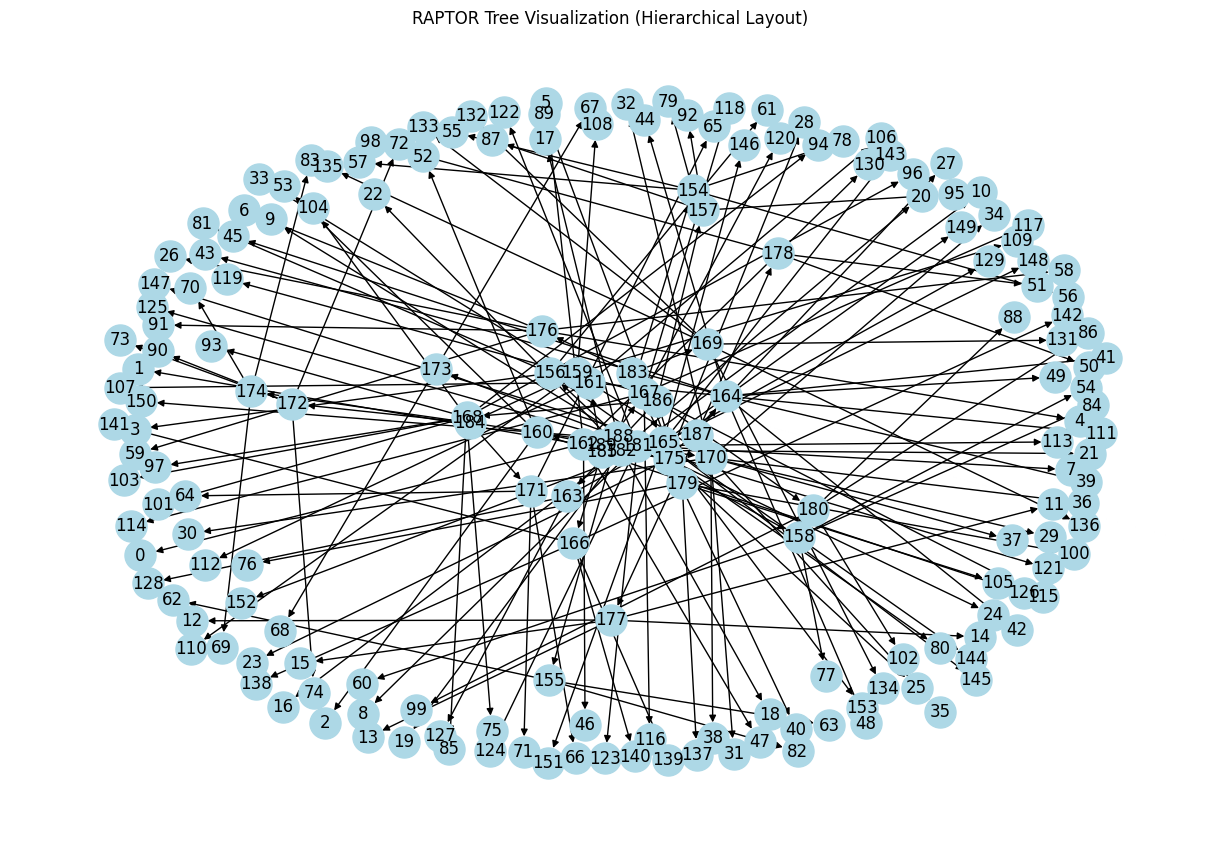

In [75]:
import networkx as nx
import matplotlib.pyplot as plt


def visualize_tree(tree):
    # Create a directed graph and add nodes/edges using node index as labels
    G = nx.DiGraph()
    for node_index, node in tree.all_nodes.items():
        label = str(node_index)
        G.add_node(node_index, label=label)
        for child_index in node.children:
            G.add_edge(node_index, child_index)
    
    # Try using Graphviz layout to enforce a hierarchical structure
    try:
        pos = nx.bfs_layout(G, 0)
    except Exception as e:
        print("bfs did not work layout not available, falling back to spring layout.")
        print(e)
        pos = nx.spring_layout(G)
    
    labels = nx.get_node_attributes(G, 'label')
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels=labels,
            node_color='lightblue', node_size=500, arrowstyle='-|>')
    plt.title("RAPTOR Tree Visualization (Hierarchical Layout)")
    plt.show()
    return G

# Example usage:
if RA.tree is not None:
    G = visualize_tree(RA.tree)
else:
    print("Tree is not built yet.")

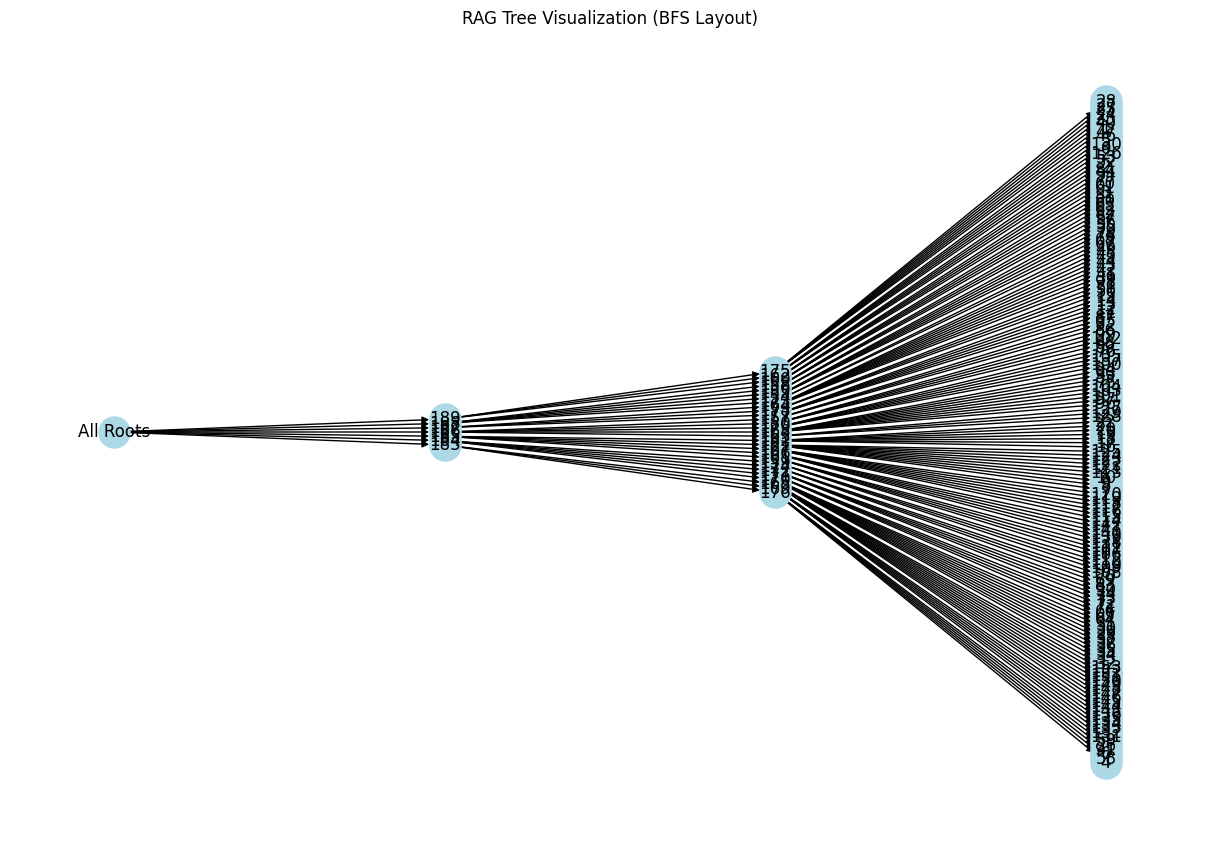

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_rag_tree_bfs(tree):
    # Build the directed graph from the tree
    G = nx.DiGraph()
    for node_index, node in tree.all_nodes.items():
        # Use the node index as label or modify as necessary
        G.add_node(node_index, label=str(node_index))
        for child in node.children:
            if child in tree.all_nodes:
                G.add_edge(node_index, child)
    
    # Determine start node: if multiple roots, add an implied root
    if isinstance(tree.root_nodes, dict):
        root_nodes = list(tree.root_nodes.values())
    else:
        root_nodes = tree.root_nodes

    if len(root_nodes) > 1:
        implied_root = -1  # Use a negative id to avoid conflict
        G.add_node(implied_root, label="All Roots")
        for root in root_nodes:
            G.add_edge(implied_root, root.index)
        start = implied_root
    else:
        start = root_nodes[0].index

    # Extract the connected component for the start node
    undirected_G = G.to_undirected()
    component = nx.node_connected_component(undirected_G, start)
    subG = G.subgraph(component)

    # Compute the BFS layout for the connected subgraph
    pos = nx.bfs_layout(subG, start)

    # Filter labels to only include nodes in the computed layout
    labels = nx.get_node_attributes(G, 'label')
    filtered_labels = {n: labels[n] for n in subG.nodes() if n in labels}

    plt.figure(figsize=(12, 8))
    nx.draw(subG, pos, with_labels=True, labels=filtered_labels,
            node_color='lightblue', node_size=500, arrowstyle='-|>')
    plt.title("RAG Tree Visualization (BFS Layout)")
    plt.show()

# # Example usage with RA.tree:
# if RA.tree is not None:
#     visualize_rag_tree_bfs(RA.tree)
# else:
#     print("RAG tree is not built yet.")

# Example usage with a RAG tree from the RetrievalAugmentation instance RA:
if RA.tree is not None:
    visualize_rag_tree_bfs(RA.tree)
else:
    print("RAG tree is not built yet.")

In [ ]:
RA

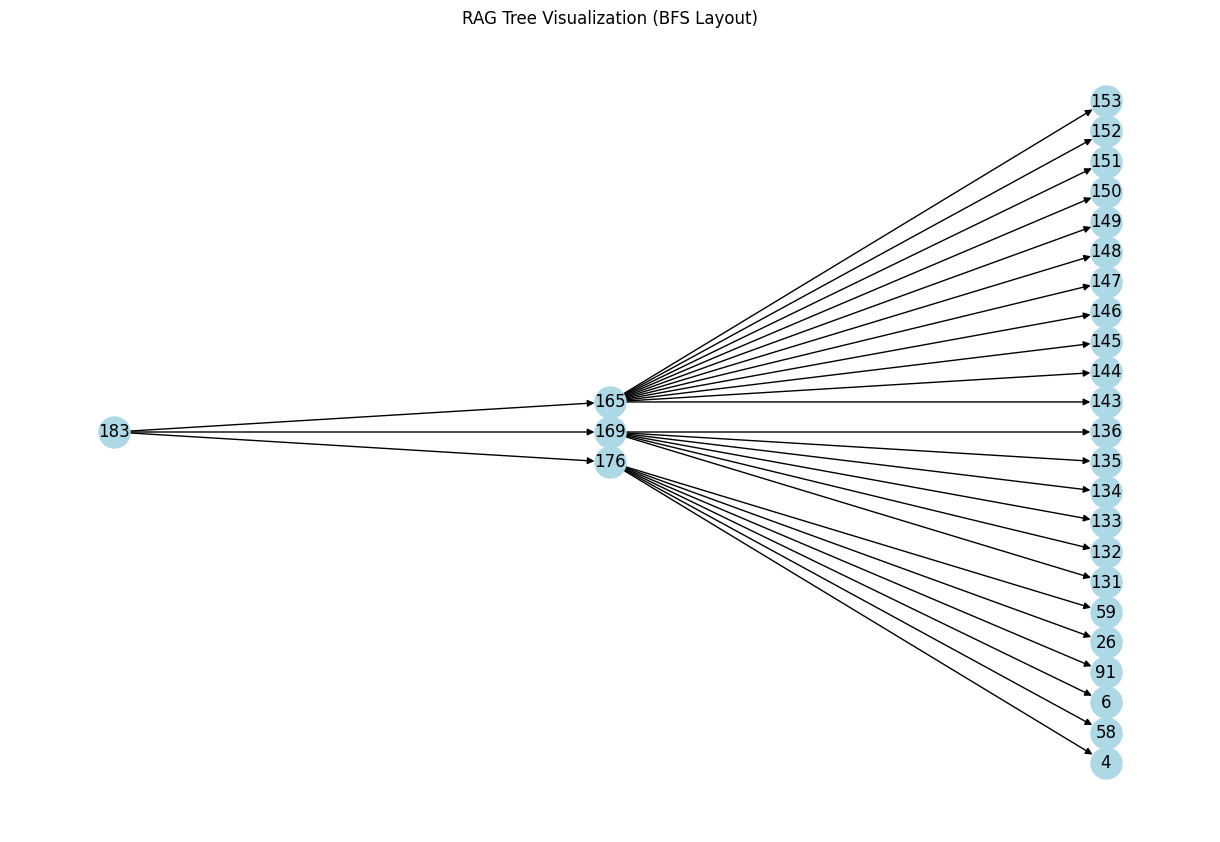

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_rag_tree_with_implied_root(tree):
    # Build a directed graph from the tree structure.
    G = nx.DiGraph()
    for node_index, node in tree.all_nodes.items():
        # Use a short version of text as label
        G.add_node(node_index, label=node.text[:10])
        for child_index in node.children:
            G.add_edge(node_index, child_index)
    
    # If there is more than one root, add an implied zeroth node to connect them.
    if len(tree.root_nodes) > 1:
        implied_root = -1  # use a negative id for the new node
        G.add_node(implied_root, label="All Roots")
        for root in tree.root_nodes:
            # Assume each root is a Node, adjust if tree.root_nodes is a list of indices.
            G.add_edge(implied_root, root.index)
        start = implied_root
    else:
        # Use the single root
        start = tree.root_nodes[0].index

    # Extract the connected component that contains the start node.
    undirected_G = G.to_undirected()
    component = nx.node_connected_component(undirected_G, start)
    subG = G.subgraph(component)

    # Compute BFS layout from the start node.
    pos = nx.bfs_tree(subG, source=start)
    labels = nx.get_node_attributes(G, 'label')
    filtered_labels = {n: labels[n] for n in subG.nodes() if n in labels}

    plt.figure(figsize=(12, 8))
    nx.draw(subG, pos, with_labels=True, labels=filtered_labels,
            node_color='lightblue', node_size=500, arrowstyle='-|>')
    plt.title("RAG Tree Visualization with Implied Root")
    plt.show()
# Example usage:
# if RA.tree is not None:
#     visualize_rag_tree_bfs(RA.tree)
# else:
#     print("RAG tree is not built yet.")
if RA.tree is not None:
    visualize_rag_tree_bfs(RA.tree)
else:
    print("RAG tree is not built yet.")

In [54]:
RA.tree.all_nodes[1].text

'(Radiology)  40 - Magnetic Resonance Imaging (MRI) Procedures  40 1 – Magnetic Resonance Angiography (MRA)  40 1 1 - Magnetic Resonance Angiography (MRA) Coverage Summary  40 1 2 - HCPCS Coding Requirements  40 1 3 - Special Billing Instructions for RHCs and FQHCs  40 1 4 - Payment Requirements  40 2 - Medicare Summary Notices (MSN), Reason Codes, and Remark Codes  50 - Nuclear Medicine (CPT 78000 - 79999)  50 1 - Payments for Radionuclides  50 2 - Stressing Agent  50 2 1 - A/B MAC (A) Payment for IV Persantine  50 2 2 - A/B MAC (A) Payment for Adenosine  50 3 - Application of Multiple Procedure Policy (CPT Modifier “-51”)  50 4 - Generation and Interpretation of Automated Data  60 - Positron Emission Tomography (PET) Scans - General Information  60 1 - Billing Instructions  60 2 - Use of Gamma Camera and Full and Partial Ring PET Scanners for PET Scans  60 2 1 - Coverage for Myocardial Viability  60 3 - PET Scan Qualifying Conditions and HCPCS Code Chart  60 3 1 - Appropriate CPT Cod